# Analisis del problema
 Se necesita predecir, a partir de una serie de características fisicoquímicas del vino, la calidad del mismo en una escala numérica. Estas características incluyen propiedades como la acidez fija, el nivel de alcohol, el pH, el contenido de azúcar residual, entre otras, que se obtienen a través de pruebas de laboratorio. El objetivo es entrenar un modelo de machine learning que pueda aprender patrones en los datos y, con base en las características de un vino nuevo, predecir su calidad de manera automática.

En este contexto, "clasificar la calidad del vino" significa asignar una etiqueta o clase de calidad a cada vino basado en sus atributos. Esta calidad es usualmente representada como una variable categórica ordinal (por ejemplo, del 3 al 8 en nuestro dataset), donde un número mayor indica una mejor calidad. La tarea de clasificación busca minimizar los errores al asignar incorrectamente la calidad, identificando correctamente tanto los vinos de alta como de baja calidad.

# Entendimiento de los datos
El dataset contiene varias características fisicoquímicas del vino que permiten predecir su calidad. A continuación, se describen las principales columnas:

`fixed acidity` (float): Nivel de acidez fija que afecta el sabor del vino.

`volatile acidity` (float): Ácidos que se evaporan, niveles altos indican menor calidad.

`citric acid` (float): Añade frescura al vino, influyendo en la percepción de calidad.

`residual sugar` (float): Cantidad de azúcar residual tras la fermentación.

`chlorides` (float): Contenido de sal; niveles altos pueden ser un indicador negativo.

`free sulfur dioxide` (float) y `total sulfur dioxide` (float): Agentes conservantes que, en exceso, pueden afectar el aroma y sabor.

`density` (float): Relacionada con el contenido de alcohol y azúcar.

`pH` (float): Indica la acidez o alcalinidad del vino.

`sulphates` (float): Conservante que influye en la estabilidad y el sabor.

`alcohol` (float): Nivel de alcohol, impacta la calidad percibida.

`type` (categorical): Tipo de vino (tinto o blanco).

`quality` (integer): Variable objetivo, mide la calidad del vino en una escala de 3 a 8.

Las características son principalmente numéricas, y la variable de tipo se convierte en una variable categórica para su uso en el modelo.

## Librerias

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import numpy as np


In [3]:
# Load dataset
file_path = '../datasets/winequalityN.csv'
wine_data = pd.read_csv(file_path)

X = wine_data.drop(columns=['quality'])
y = wine_data['quality']

X = pd.get_dummies(X, columns=['type'], drop_first=True)

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# Modelo

In [4]:

model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42, class_weight='balanced' )
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)

report = classification_report(y_test, y_pred)
print(report)


[7 6 6 ... 7 6 6]
              precision    recall  f1-score   support

           3       1.00      0.17      0.29         6
           4       0.55      0.19      0.28        63
           5       0.67      0.72      0.70       640
           6       0.66      0.70      0.68       862
           7       0.61      0.57      0.59       325
           8       0.73      0.30      0.42        54

    accuracy                           0.66      1950
   macro avg       0.70      0.44      0.49      1950
weighted avg       0.66      0.66      0.65      1950



# Evaluaciones

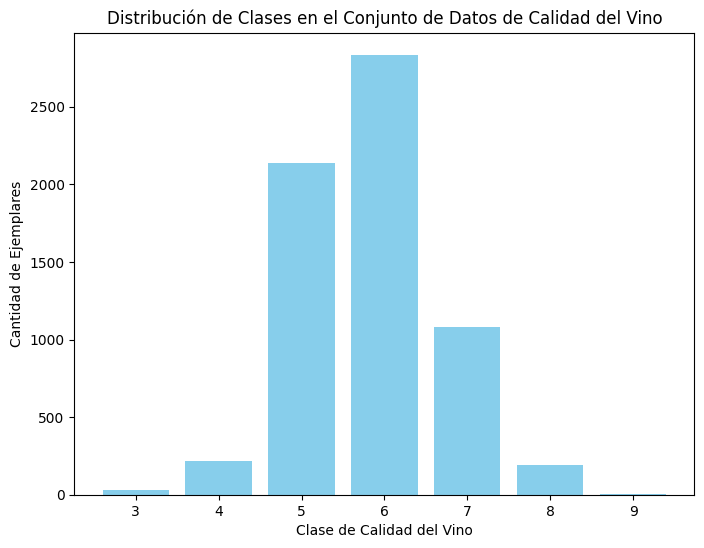

In [5]:

class_distribution = wine_data['quality'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(class_distribution.index, class_distribution.values, color='skyblue')
plt.xlabel('Clase de Calidad del Vino')
plt.ylabel('Cantidad de Ejemplares')
plt.title('Distribución de Clases en el Conjunto de Datos de Calidad del Vino')
plt.xticks(class_distribution.index)
plt.show()


In [6]:
y_pred_test = model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

def calculate_metrics(conf_matrix):
    tp = np.diag(conf_matrix)
    fp = conf_matrix.sum(axis=0) - tp
    fn = conf_matrix.sum(axis=1) - tp
    tn = conf_matrix.sum() - (fp + fn + tp)

    accuracy = (tp.sum() / conf_matrix.sum())

    sensitivity = tp / (tp + fn)

    specificity = tn / (tn + fp)

    return accuracy, sensitivity, specificity

accuracy, sensitivity, specificity = calculate_metrics(conf_matrix)

print("Precisión global:", accuracy)
print("Sensibilidad (recall) por clase:", sensitivity)
print("Especificidad por clase:", specificity)

print("\nInforme de clasificación:\n", classification_report(y_test, y_pred_test))

Precisión global: 0.6569230769230769
Sensibilidad (recall) por clase: [0.16666667 0.19047619 0.725      0.70069606 0.56615385 0.2962963 ]
Especificidad por clase: [1.         0.99470058 0.82900763 0.71231618 0.92861538 0.99683544]

Informe de clasificación:
               precision    recall  f1-score   support

           3       1.00      0.17      0.29         6
           4       0.55      0.19      0.28        63
           5       0.67      0.72      0.70       640
           6       0.66      0.70      0.68       862
           7       0.61      0.57      0.59       325
           8       0.73      0.30      0.42        54

    accuracy                           0.66      1950
   macro avg       0.70      0.44      0.49      1950
weighted avg       0.66      0.66      0.65      1950



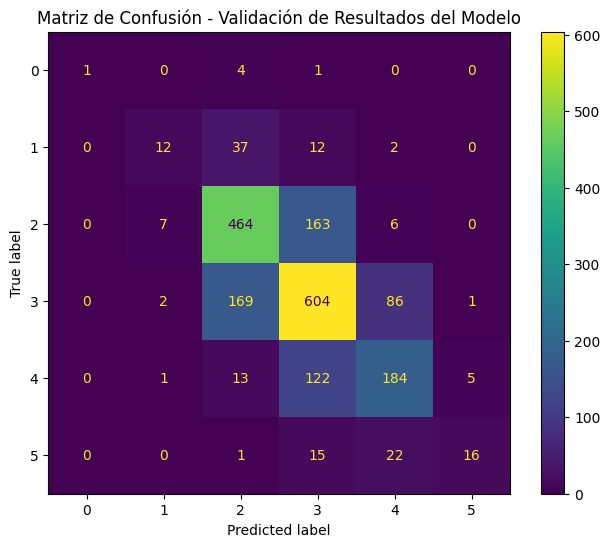

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot(ax=ax)
plt.title("Matriz de Confusión - Validación de Resultados del Modelo")
plt.show()

# Resultados
El modelo de clasificación Random Forest logró una **precisión global del 67%**, lo que indica un rendimiento aceptable en general. La matriz de confusión muestra que el modelo clasifica correctamente las clases más comunes, como las calidades **5** y **6**, con un **recall** (sensibilidad) del 71% y 77%, respectivamente. Sin embargo, tiene dificultades para identificar las clases menos representadas, como la calidad **3**, que no fue predicha correctamente, y la calidad **4**, que presenta un **recall** del 14%. Además, el modelo confunde las clases intermedias (5 y 6) con las clases adyacentes, sugiriendo que hay margen de mejora en la diferenciación entre clases cercanas en términos de calidad. Aunque los resultados son razonables para las clases mayoritarias, se podrían realizar ajustes adicionales, como balancear las clases o afinar los hiperparámetros, para mejorar el rendimiento en las clases minoritarias.